<a href="https://colab.research.google.com/github/Ankitajadhav611/TensorFlow_prac/blob/master/TextClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2020-09-25 11:27:25--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.214.128, 173.194.216.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2020-09-25 11:27:25 (176 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_6 ( (None, 16)                0         
_____________________________________________________

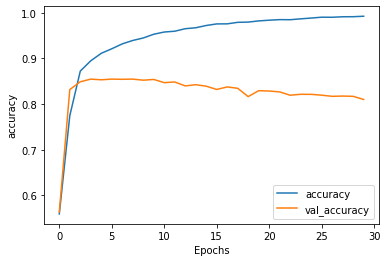

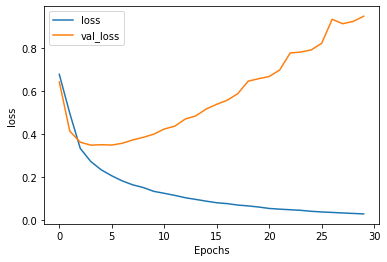

In [12]:
#!pip freeze

#text classifications
import tensorflow 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json
import json 
with open("/tmp/sarcasm.json","r") as f:
  datastore = json.load(f)
sentence = []
label = []
for f in datastore:
  sentence.append(f["headline"])
  label.append(f["is_sarcastic"])
#splitting the data into the train and test set
train_len = 20000
train_sentence = sentence[:train_len]
test_sentence = sentence[train_len:]
train_label = label[:train_len]
test_label = label[train_len:]

#encode the data 
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words=vocab_size ,oov_token = oov_tok)
tokenizer.fit_on_texts(train_sentence)   #fit or train the tokenizer according to the training sentences
word_index = tokenizer.word_index       # to store the word_index dictionary into word_index, check to check the word_index value integer 

train_seq = tokenizer.texts_to_sequences(train_sentence)
train_padded = pad_sequences(train_seq, maxlen = max_length , padding = padding_type , truncating=trunc_type)

test_seq = tokenizer.texts_to_sequences(test_sentence)
test_padded = pad_sequences(test_seq,maxlen= max_length,padding=padding_type,truncating=trunc_type)

#coverting the list into numpy array elements
import numpy as np
train_padded = np.array(train_padded)
train_label = np.array(train_label)
test_paded = np.array(test_padded)
test_label = np.array(test_label)
# model creation, three layer
model = tensorflow.keras.Sequential([
                                     tensorflow.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                                     tensorflow.keras.layers.GlobalAveragePooling1D(),
                                     tensorflow.keras.layers.Dense(24,activation="relu"),
                                     tensorflow.keras.layers.Dense(1,activation = "sigmoid")
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
# fit the model
num_epochs = 30
history = model.fit(train_padded,train_label,epochs=num_epochs,validation_data=(test_padded,test_label),verbose=2)
#plot the results
import matplotlib.pyplot as plt

def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
plot_graphs(history, "accuracy")
plot_graphs(history,'loss')

